# Exploratory Analysis of Bank Transactions and Anomaly Detection

---

## Introduction & Objective

This project explores a bank transaction dataset to uncover insights into user financial behaviour and identify potential anomalies or suspicious activity. Using Python and common data analysis tools, we will clean, explore, and visualise the data to simulate real-world financial analytics processes. This work serves as a practical portfolio project to demonstrate key data analysis skills.

### <u>Objective</u>
The goal of this project is to analyse a sample of bank transaction data to:

- Understand customer transaction behaviour across different channels, times, and locations.
- Identify unusual or potentially fraudulent transactions using simple rule-based anomaly detection techniques.
- Practice essential data analysis tasks including data cleaning, feature engineering, visualisation, and insight generation using Python.

This project is designed as a portfolio piece for data analyst roles and focuses on real-world analytical thinking, not just code.

### <u>Why This Matters</u>
In the modern digital economy, banking systems process millions of transactions daily. Financial institutions must continuously monitor these transactions to:

- Detect fraudulent activity.
- Understand customer behaviour to improve services.
- Maintain account security and financial integrity.

By analysing patterns in transactional data, we can uncover insights that are useful for fraud detection, risk management, and product personalisation. Even with a small dataset, the techniques applied here reflect processes used in real-world analytics teams in the financial sector.

### <u>About the Dataset</u>
The dataset used in this project is titled “**Bank Transaction Dataset for Fraud Detection**” and is publicly available on Kaggle:
[Bank Transaction Dataset for Fraud Detection - Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

It contains 2,512 individual bank transactions with the following features:

- Transaction metadata: transaction ID, amount, date, type (credit/debit), merchant, location, device, IP.
- Account holder data: customer age, occupation, account balance, previous transaction time.
- Interaction data: login attempts, transaction duration, channel used.

These features allow us to explore both financial patterns and user behaviour across time, geography, and transaction types.

### <u>Key Questions to Explore</u>
This project aims to explore the following:

1. What are the typical transaction patterns across users? (time, channel, type)
2. Are there differences in behaviour based on customer age or occupation?
3. How do users interact with different devices, channels, and locations?
4. Are there transactions that appear suspicious based on volume, time, or user behaviour?
5. Can we derive any simple rule-based indicators that may help detect anomalies?

### <u>Tools & Technologies</u>
- Python (Jupyter Notebook)
- Pandas, NumPy for data handling and cleaning
- Matplotlib, Seaborn, Plotly for visualisation
- Datetime for time-based features and analysis

---

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx

---

## Data Loading & Initial Inspection

In this section, we load the dataset and conduct an initial inspection to understand its structure, data types, and completeness. This forms the foundation for all further analysis by helping us identify potential issues such as missing values, incorrect data types, and duplicate records.

We begin by reading the CSV file into a Pandas DataFrame and displaying the first few rows to get an initial sense of the data.

In [2]:
# read the CSV file
df = pd.read_csv('bank_transactions_data.csv')
# display the first few rows of the dataframe
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


The `.info()` method helps us quickly examine column names, data types, and any null values. This is useful for spotting columns that may need cleaning or conversion.

In [3]:
# inspect the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

It is immediately apparent that the `TransactionDate` and `PreviousTransactionDate` columns are currently of `object` data type; consequently, they should be converted to `datetime` format to facilitate time-based analysis later in the project.

In [4]:
# change the data type of the 'TransactionDate' column to datetime with format year-month-day hour-minute-second
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of TransactionDate is now:', df['TransactionDate'].dtype)
# change the data type of the 'PreviousTransactionDate' column to datetime with format year-month-day hour-minute-second
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of PreviousTransactionDate is now:',df['PreviousTransactionDate'].dtype)

Data type of TransactionDate is now: datetime64[ns]
Data type of PreviousTransactionDate is now: datetime64[ns]



It is also worth noting that each column contains 2512 non-null values, which is the exact number of bank transactions in the dataset. However, let us confirm the absence of any null values across all columns.

In [5]:
# check for missing values
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Let us check for:
- Exact duplicates across all columns
- Duplicate entries based on key transaction features (excluding `TransactionID`)

In [6]:
# check for exact duplicates
print('Number of exact duplicates:',df.duplicated().sum())

Number of exact duplicates: 0


In [7]:
# check for duplicates in key transaction features (excluding TransactionID)
duplicates = df.duplicated(subset=['AccountID', 'TransactionAmount', 'TransactionDate']).sum()
print('Number of duplicates based on key transaction features:', duplicates)

Number of duplicates based on key transaction features: 0


Understanding how many unique values exist in each column helps us distinguish between categorical and continuous data, and may highlight inconsistencies.

In [8]:
# check for unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

TransactionID: 2512 unique values
AccountID: 495 unique values
TransactionAmount: 2455 unique values
TransactionDate: 2512 unique values
TransactionType: 2 unique values
Location: 43 unique values
DeviceID: 681 unique values
IP Address: 592 unique values
MerchantID: 100 unique values
Channel: 3 unique values
CustomerAge: 63 unique values
CustomerOccupation: 4 unique values
TransactionDuration: 288 unique values
LoginAttempts: 5 unique values
AccountBalance: 2510 unique values
PreviousTransactionDate: 360 unique values


In [9]:
# inspect the unique values in the 'TransactionType' column
print('Unique values in TransactionType:', df['TransactionType'].unique())
# inspect the unique values in the 'Channel' column
print('Unique values in Channel:', df['Channel'].unique())

Unique values in TransactionType: ['Debit' 'Credit']
Unique values in Channel: ['ATM' 'Online' 'Branch']


Categorical columns like `TransactionType` and `Channel` are converted to the `category` datatype. This conversion aids in memory optimisation and simplifies future plotting.

In [10]:
# change the data type of the 'TransactionType' column to category
df['TransactionType'] = df['TransactionType'].astype('category')
print('Data type of TransactionType is now:',df['TransactionType'].dtype)
# change the data type of the 'Channel' column to category
df['Channel'] = df['Channel'].astype('category')
print('Data type of Channel is now:',df['Channel'].dtype)

Data type of TransactionType is now: category
Data type of Channel is now: category


We generate descriptive statistics for all columns, including both numerical and categorical variables. This provides a high-level overview of the dataset’s distribution and potential anomalies.

In [11]:
# describe the data with all columns included
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


---

Having loaded and inspected the dataset, we can now move on to cleaning and preparing the data. This includes handling missing values, standardizing formats, and engineering useful features for analysis.

## Data Cleaning

With our initial inspection complete, we now clean the dataset and engineer new features to enhance our analysis.

In this section, we:
- Standardise and validate fields like `Location` and `IP Address`.
- Create new time-based and transaction-based features.
- Flag potentially high-value transactions.

We begin by inspecting the `Location` column for formatting inconsistencies. Clean and consistent location names are important for grouping and geographic analysis later in the project.

In [12]:
# check location column for formatting issues
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

All entries in the `Location` column are consistently formatted and do not require any cleaning at this stage.

Next, we verify whether the `IP Address` values follow the expected IPv4 format (e.g., `192.168.0.1`). This helps identify any malformed or potentially suspicious entries that might suggest spoofing or data issues.

In [13]:
# validate the format of the IP address in the 'IP Address' column
# the regex pattern checks for four groups of 1 to 3 digits separated by dots, ensuring that each group is between 0 and 255.
df['IsValidIP'] = df['IP Address'].apply(lambda x: bool(re.match(r'^\d{1,3}(\.\d{1,3}){3}$', x)))
df['IsValidIP'].value_counts()

IsValidIP
True    2512
Name: count, dtype: int64

All entries in the `IP Address` column follow a valid IPv4 format and appear correctly structured.

To explore patterns in transaction behaviour over the day, we extract the hour component from the `TransactionDate`. This will help us analyse usage trends during different parts of the day (e.g., working hours vs. late night). We will also print the unique values of this column for inspection.

In [14]:
# extract the hour from the 'TransactionDate' column and create a new column 'TransactionHour'
df['TransactionHour'] = df['TransactionDate'].dt.hour
print(df[['TransactionDate', 'TransactionHour']].head())
print('Unique values of TransactionHour:', df['TransactionHour'].unique())

      TransactionDate  TransactionHour
0 2023-04-11 16:29:14               16
1 2023-06-27 16:44:19               16
2 2023-07-10 18:16:08               18
3 2023-05-05 16:32:11               16
4 2023-10-16 17:51:24               17
Unique values of TransactionHour: [16 18 17]


We calculate the number of days between each transaction and the previous one for the same account. This feature helps us analyse transaction frequency and potentially detect abnormal activity patterns.

In [15]:
# calculate days between transaction date and previous transaction date
df['DaysBetweenTransactions'] = (df['PreviousTransactionDate'] - df['TransactionDate']).dt.days
df['DaysBetweenTransactions'].describe()

count    2512.000000
mean      486.857882
std       106.378910
min       307.000000
25%       394.000000
50%       485.000000
75%       580.000000
max       671.000000
Name: DaysBetweenTransactions, dtype: float64

High-value transactions can often be linked to fraudulent activity or exceptional behaviour. Here, we define a high-value transaction as one in the top 10% of all transaction amounts.

In [16]:
# create a new column for high-value transactions
# assuming high-value transactions are defined as those in the top 10% of transaction amounts
high_value_threshold = df['TransactionAmount'].quantile(0.90)
print(f"The 90th percentile for TransactionAmount is: {high_value_threshold}")

df['IsHighValueTransaction'] = df['TransactionAmount'] > high_value_threshold

print(df[['TransactionAmount', 'IsHighValueTransaction']].head())

The 90th percentile for TransactionAmount is: 701.3120000000004
   TransactionAmount  IsHighValueTransaction
0              14.09                   False
1             376.24                   False
2             126.29                   False
3             184.50                   False
4              13.45                   False


The dataset is now cleaned and enhanced with new features. These new features will allow for deeper behavioural and anomaly analysis in the next sections.

---

## Exploratory Data Analysis (EDA)

EDA is a critical first step in any data analysis project. It allows us to understand the structure, distribution, and relationships within the data before moving on to more advanced modelling or business decision-making.

### Overview of Transactions

In this section, we focus on understanding the overall transaction behaviour across the dataset, including transaction amounts, volume trends, transaction types, and the frequency of high-value transactions.

#### Distribution of Transaction Amounts

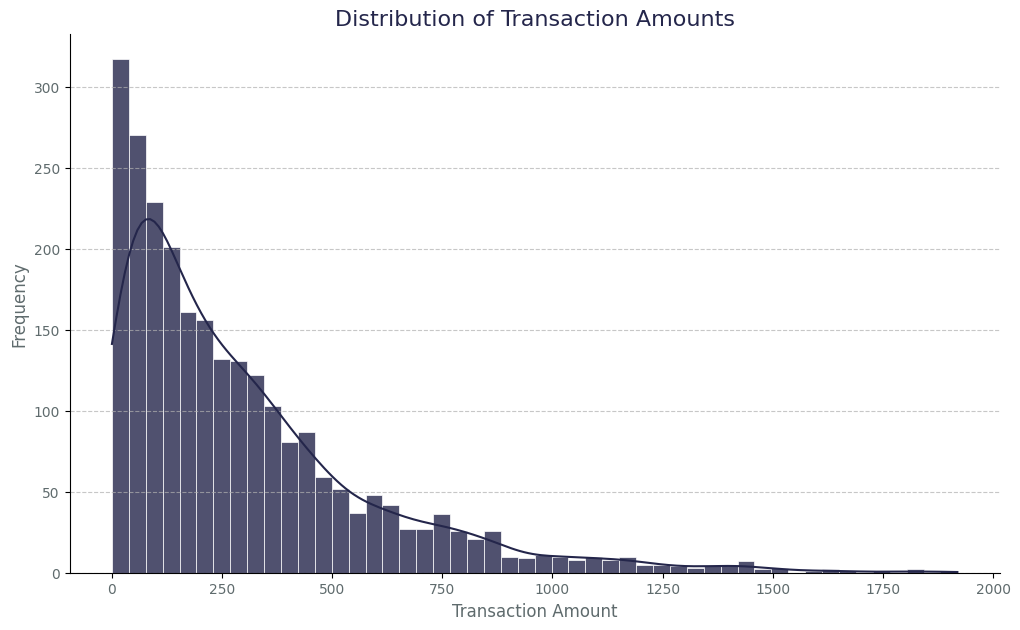

In [ ]:
# transaction amount distribution
# histogram of transaction amounts

plt.figure(figsize=(12, 7))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='#24264B', edgecolor='white', linewidth=0.5, alpha=0.8)
plt.title('Distribution of Transaction Amounts', fontsize=16, color='#24264B')
plt.xlabel('Transaction Amount', fontsize=12, color='#5F6B6D')
plt.ylabel('Frequency', fontsize=12, color='#5F6B6D')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.xticks(fontsize=10, color='#5F6B6D')
plt.yticks(fontsize=10, color='#5F6B6D')
plt.show()


The distribution of transaction amounts is right-skewed, indicating that most transactions fall in the lower range, with a long tail of high-value outliers. This is typical in financial datasets, where routine transactions (e.g., groceries, small purchases) dominate, and large purchases are less frequent but impactful.

Understanding this distribution helps us identify the threshold for what qualifies as a "high-value" transaction and assess general customer spending behavior.

#### Daily Transaction Volume with 7-Day Moving Average

In [ ]:
# daily transaction volume over time
# with a 7-day moving average
daily_transactions = df.groupby(df['TransactionDate'].dt.date).size()
daily_transactions_ma = daily_transactions.rolling(window=7).mean()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=daily_transactions.index,
        y=daily_transactions.values,
        mode='lines+markers',
        name='Daily Transactions',
        line=dict(color='#4A5899'),
        marker=dict(color='#24264B', size=4, opacity=0.7)
    )
)

fig.add_trace(
    go.Scatter(
        x=daily_transactions_ma.index,
        y=daily_transactions_ma.values,
        mode='lines',
        name='7-Day Moving Average',
        line=dict(color='#B12955', width=2)
    )
)

fig.update_layout(
    title=dict(text='Daily Transaction Volume with 7-Day Moving Average', font=dict(size=18, color='#24264B')),
    xaxis_title=dict(text='Date', font=dict(size=12, color='#5F6B6D')),
    yaxis_title=dict(text='Number of Transactions', font=dict(size=12, color='#5F6B6D')),
    legend=dict(title='Legend', font=dict(size=10, color='#5F6B6D')),
    template='plotly_white',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# fig.show()

# write the figure to a png file
fig.write_image("daily_transaction_volume.png", width=1200, height=700)

![Daily Transaction Volume with 7-Day Moving Average](daily_transaction_volume.png)

This plot shows daily transaction counts over time, along with a 7-day moving average to smooth out short-term fluctuations.

We observe regular weekly spikes, particularly on Mondays. This pattern is likely due to weekend transactions being processed in bulk on Mondays, causing an inflated count. We will explore this more in the time-based analysis later.

#### Weekly Average Transaction Amount


In [19]:
# average transaction amount over time (aggregated weekly)
df['TransactionWeek'] = df['TransactionDate'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_avg_transaction_amount = df.groupby('TransactionWeek')['TransactionAmount'].mean()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=weekly_avg_transaction_amount.index,
        y=weekly_avg_transaction_amount.values,
        mode='lines+markers',
        name='Weekly Average Transaction Amount',
        marker=dict(symbol='circle', color='#24264B', size=4, opacity=0.7),
        line=dict(color='#4A5899', dash='solid')
    )
)

fig.update_layout(
    title=dict(text='Weekly Average Transaction Amount', font=dict(size=18, color='#24264B')),
    xaxis_title=dict(text='Week', font=dict(size=12, color='#5F6B6D')),
    yaxis_title=dict(text='Average Transaction Amount', font=dict(size=12, color='#5F6B6D')),
    legend=dict(title='Legend', font=dict(size=10, color='#5F6B6D')),
    template='plotly_white',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

fig.show()


By aggregating the transaction amount weekly, we can observe fluctuations in customer spending over time. While the average weekly amount remains relatively stable, there are periodic spikes and drops that may correspond to events like holidays, salary periods, or bulk spending behavior.

This chart helps identify financial trends and customer activity patterns at a higher level of granularity.

#### Credit vs Debit Volume

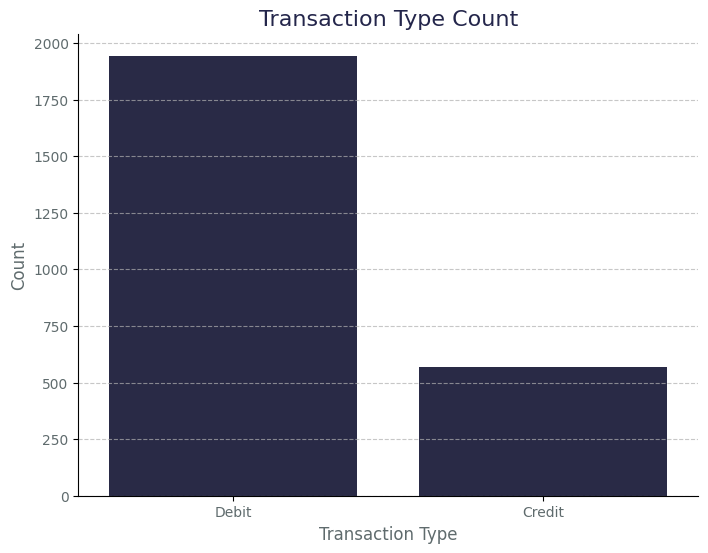

In [20]:
# credit vs. debit volume
# bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index, color='#24264B')
plt.title('Transaction Type Count', fontsize=16, color='#24264B')
plt.xlabel('Transaction Type', fontsize=12, color='#5F6B6D')
plt.ylabel('Count', fontsize=12, color='#5F6B6D')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.xticks(fontsize=10, color='#5F6B6D')
plt.yticks(fontsize=10, color='#5F6B6D')
plt.show()

The vast majority of transactions are **Debit**, indicating that most activity involves customers spending money rather than receiving it.

This aligns with standard retail banking behaviour, where debit transactions (purchases, withdrawals) are more frequent than credits (salary deposits, refunds). This insight could inform fraud models or budgeting tools by focusing on debit-heavy behaviours.

#### High Value Transactions Over Time

In [21]:
# line chart of high value transactions over time
high_value_transactions = df[df['IsHighValueTransaction']].groupby(df['TransactionDate'].dt.date).size()
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=high_value_transactions.index,
        y=high_value_transactions.values,
        mode='lines+markers',
        name='High Value Transactions',
        marker=dict(symbol='circle', color='#24264B', size=4, opacity=0.7),
        line=dict(color='#4A5899', dash='solid')
    )
)
fig.update_layout(
    title=dict(text='High Value Transactions Over Time', font=dict(size=18, color='#24264B')),
    xaxis_title=dict(text='Date', font=dict(size=12, color='#5F6B6D')),
    yaxis_title=dict(text='Number of High Value Transactions', font=dict(size=12, color='#5F6B6D')),
    legend=dict(title='Legend', font=dict(size=10, color='#5F6B6D')),
    template='plotly_white',
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.show()

We previously defined high-value transactions as those above the 90th percentile in transaction amount. This chart shows the frequency of such transactions across the timeline.

Although high-value transactions occur sporadically, they are consistently present throughout the year. Monitoring these can help detect outliers or potentially suspicious activity, especially if they cluster around unusual times or locations.

### Temporal Patterns

In this section, we explore how transaction behaviour varies over time—specifically by day of the week, hour of the day, and across weekdays. These patterns help us understand user activity cycles, system scheduling effects, and potential windows of risk or opportunity.

#### Transaction Volume by Day of the Week

      TransactionDate TransactionDayOfWeek
0 2023-04-11 16:29:14              Tuesday
1 2023-06-27 16:44:19              Tuesday
2 2023-07-10 18:16:08               Monday
3 2023-05-05 16:32:11               Friday
4 2023-10-16 17:51:24               Monday


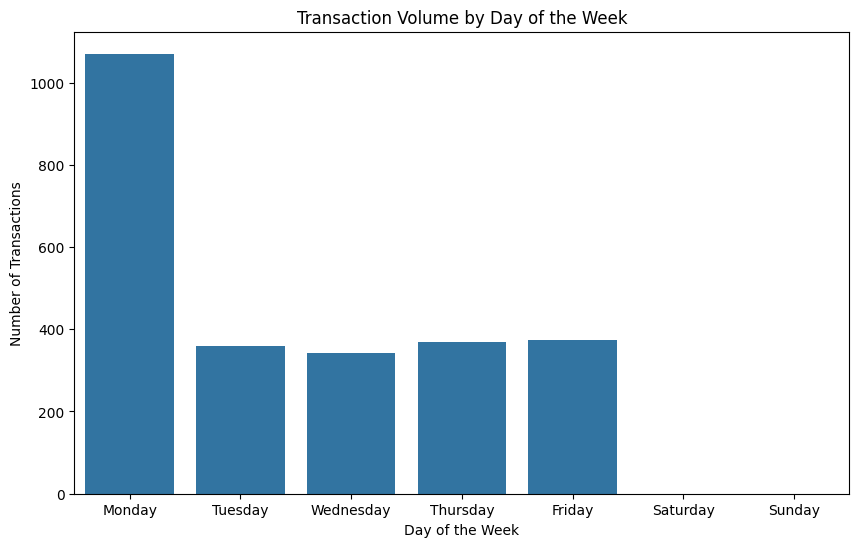

In [22]:
# add a column for day of the week
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()
print(df[['TransactionDate', 'TransactionDayOfWeek']].head())

# plot transaction volume by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionDayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

To analyse day-of-week behavior, a new column was derived from the transaction timestamp. The resulting distribution shows a dramatic spike in transactions on **Mondays**, with **zero transactions recorded on Saturdays and Sundays**.

This confirms our earlier hypothesis from Section 1: **weekend transactions are not processed in real-time**, and are instead **batched into Monday’s logs**, leading to inflated Monday counts. This insight is critical for interpreting time-based patterns without misattributing user behavior to system delays.

#### Transaction Volume by Hour of the Day

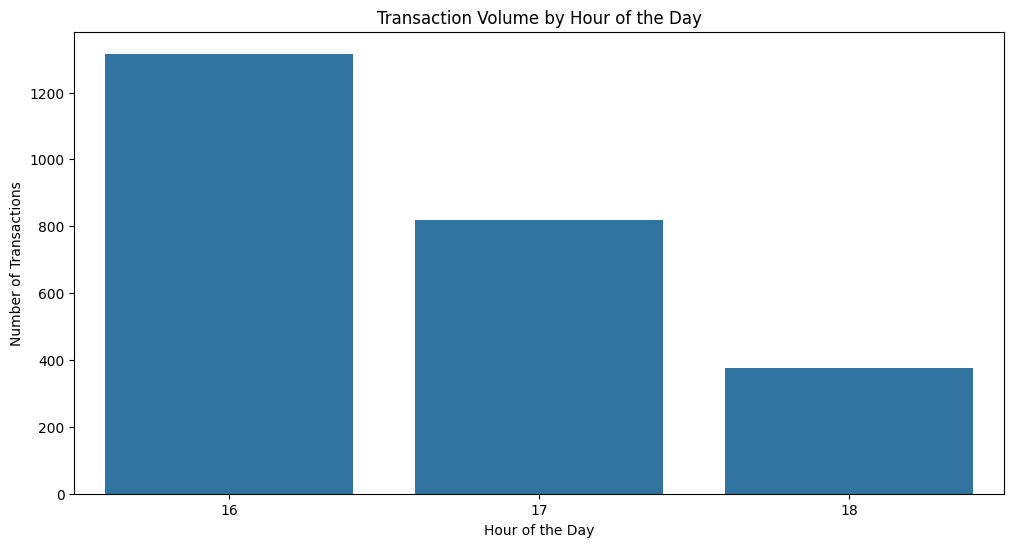

In [23]:
# transactions by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TransactionHour')
plt.title('Transaction Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

Surprisingly, all transactions occurred within a narrow window between **16:00 and 18:00**, suggesting that the system either restricts transaction logging to specific hours or batches them post-processing.

Due to this restricted timeframe, we will avoid over-interpreting temporal trends on an hourly basis. However, it remains an important observation about how the system logs or processes data.

#### Transaction Volume on Mondays

In [44]:
# line chart of count of transactions when TransactionDayOfWeek is Monday
monday_transactions = df[df['TransactionDayOfWeek'] == 'Monday'].groupby(df['TransactionDate'].dt.date).size()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=monday_transactions.index,
        y=monday_transactions.values,
        mode='lines+markers',
        name='Monday Transactions',
        marker=dict(symbol='circle')
    )
)

fig.update_layout(
    title='Transaction Volume on Mondays',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

Zooming in on Mondays alone, we observe significant variation in transaction volume across weeks. While many Mondays follow a relatively stable trend (around 20–25 transactions), certain days spike well above 30.

These spikes may be related to external factors (e.g., long weekends, holidays) or internal behaviors (e.g., increased weekend activity). It is another reminder that Monday data reflects **aggregated weekend activity**, not just Monday usage.

#### Transaction Volume on Non-Weekend Days

In [43]:
# line chart of count of transactions when TransactionDayOfWeek is not Monday, Saturday, or Sunday
non_weekend_transactions = df[~df['TransactionDayOfWeek'].isin(['Monday', 'Saturday', 'Sunday'])].groupby(df['TransactionDate'].dt.date).size()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=non_weekend_transactions.index,
        y=non_weekend_transactions.values,
        mode='lines+markers',
        name='Non-Weekend Transactions',
        marker=dict(symbol='circle')
    )
)

fig.update_layout(
    title='Transaction Volume on Non-Weekend Days',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

When we isolate **non-weekend weekdays (Tuesday to Friday)**, the transaction volume appears lower and more consistent—averaging around 6–12 transactions per day with smaller fluctuations.

This chart supports the view that Monday is anomalous and reinforces the importance of **handling weekend batching** when analysing patterns or training predictive models.

### User Demographics

Understanding the demographic profile of customers helps contextualise financial behavior. In this section, we analyse how **age** and **occupation** influence transaction volume, value, and channel preferences.

#### Transaction Volume by Age Group

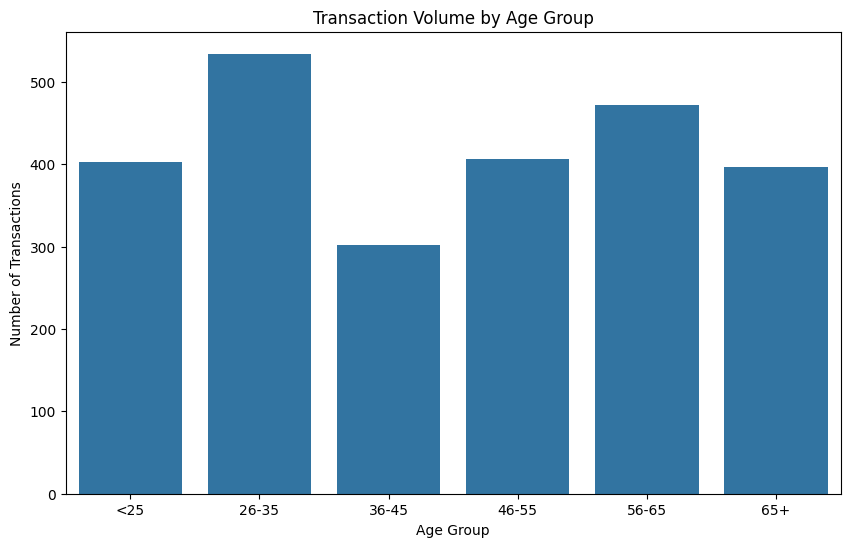

In [26]:
# transaction behaviour by customer age group
# create age bins
age_bins = [0, 25, 35, 45, 55, 65, np.inf]
age_labels = ['<25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)
# plot transaction volume by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', order=age_labels)
plt.title('Transaction Volume by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.show()

We grouped customers into age bands to analyse their transaction activity. The highest volume came from customers aged **26–35**, followed by **56–65**, and **46–55**.

This suggests that both **early-career professionals** and **older individuals (possibly retirees or those nearing retirement)** are actively using their accounts. The **<25** group also had a substantial number of transactions, which may reflect high digital engagement among younger users (e.g., students).

This distribution aligns with earlier volume patterns and provides useful segments for targeting financial products or risk models.

#### Transaction Volume by Age Group and Channel

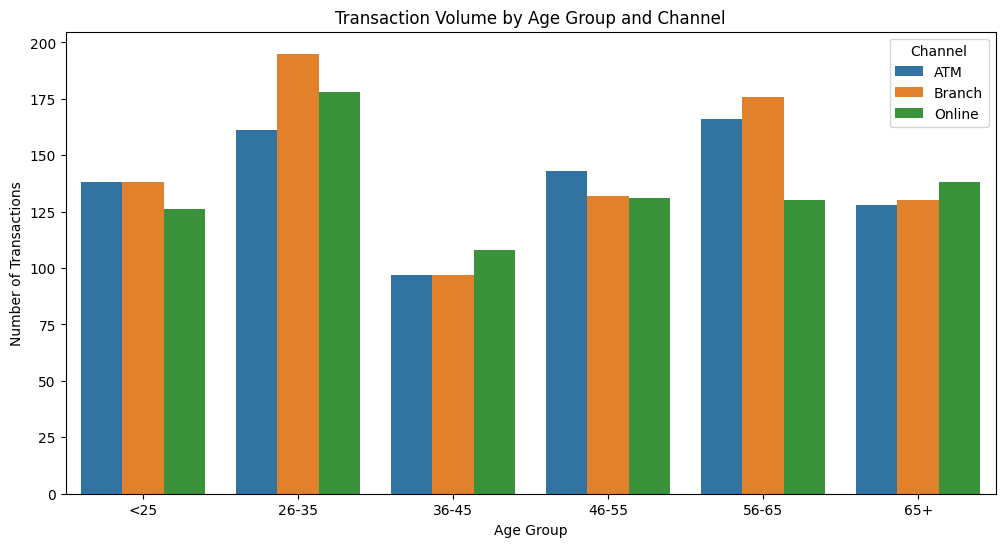

In [27]:
# stacked bar chart of channel by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='Channel', order=age_labels)
plt.title('Transaction Volume by Age Group and Channel')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(title='Channel')
plt.show()

Breaking down transaction volume further, we analysed **channel usage across age groups**. All age brackets made use of **ATM, Branch, and Online channels**, but some preferences emerged:

- The **26–35** age group had the highest volume across all channels.
- The **<25** group, while having fewer total transactions, showed relatively balanced channel usage.
- **56–65** customers favored **Branch** and **ATM**, slightly more than Online.

These trends suggest that while digital channels are consistently used, **older users may still rely more heavily on in-person services** (e.g., branches), which could be important for customer service design or fraud detection focused on less tech-savvy groups.

#### Average Transaction Amount by Occupation

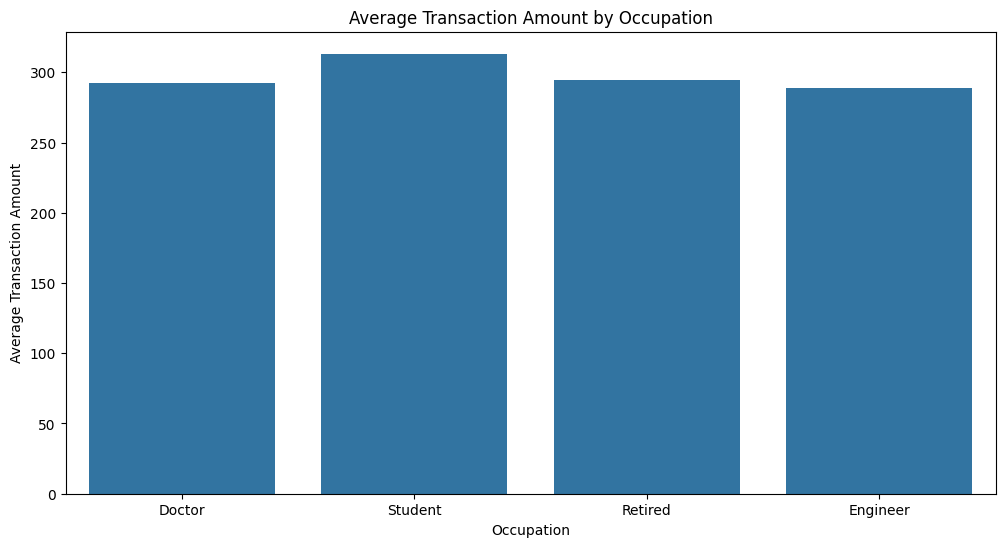

In [28]:
# occupation vs average transaction amount
# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='CustomerOccupation', y='TransactionAmount', estimator=np.mean, errorbar=None)
plt.title('Average Transaction Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Transaction Amount')
plt.show()

Analysing spending behaviour by occupation, we find that **Students** had the **highest average transaction amount** at ~\$313, followed by **Retired** individuals and **Doctors**.

This is a surprising result, as students are typically considered lower-income. However, it may indicate fewer but higher-value transactions—such as tuition or rent payments—rather than daily expenses.

It contrasts with Section 1, where we observed most transactions falling in the lower range, suggesting that different user segments may drive those outliers.

#### Transaction Volume by Occupation and Channel

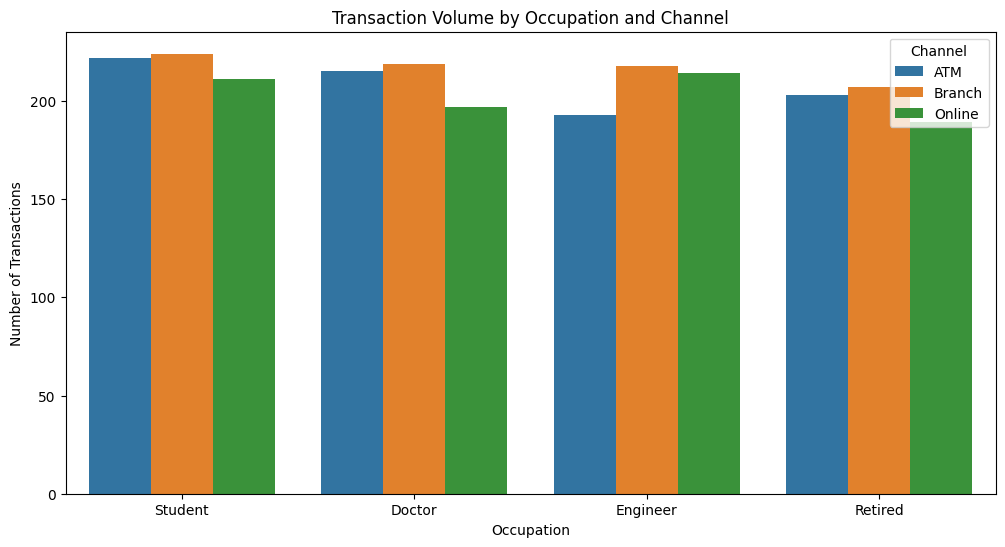

In [29]:
# grouped bar chart of occupation vs channel
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CustomerOccupation', hue='Channel', order=df['CustomerOccupation'].value_counts().index)
plt.title('Transaction Volume by Occupation and Channel')
plt.xlabel('Occupation')
plt.ylabel('Number of Transactions')
plt.legend(title='Channel')
plt.show()

To better understand channel preferences by demographic, we broke down transaction volumes across **occupation and channel**.

Each occupation uses **ATM, Branch, and Online channels** at relatively balanced levels. However:
- **Students and Doctors** show slightly higher ATM usage.
- **Engineers and Retirees** appear to have more online transactions.

This uniform channel usage suggests that all customer types are relatively comfortable with digital access, but **occupation-based targeting for channel optimisation** could still yield engagement improvements.

### Channel & Location Behaviour

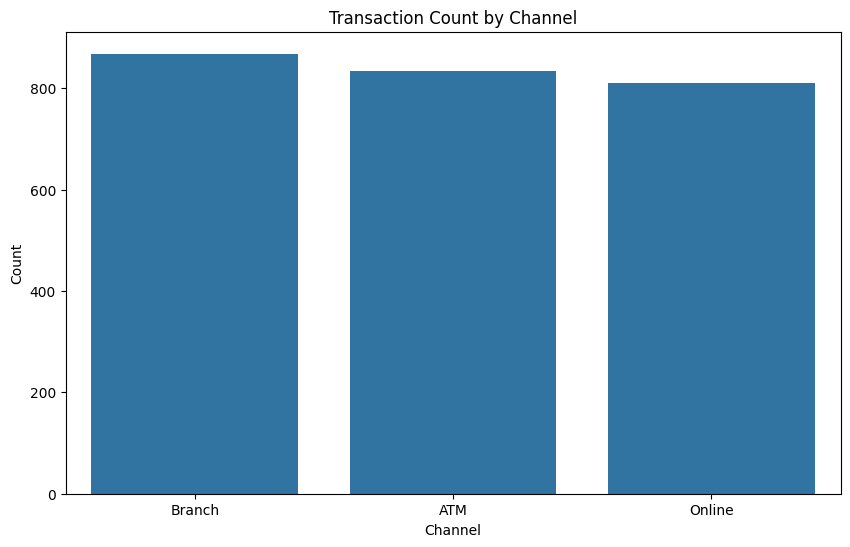

In [30]:
# transacation count by channel
# bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Channel', order=df['Channel'].value_counts().index)
plt.title('Transaction Count by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

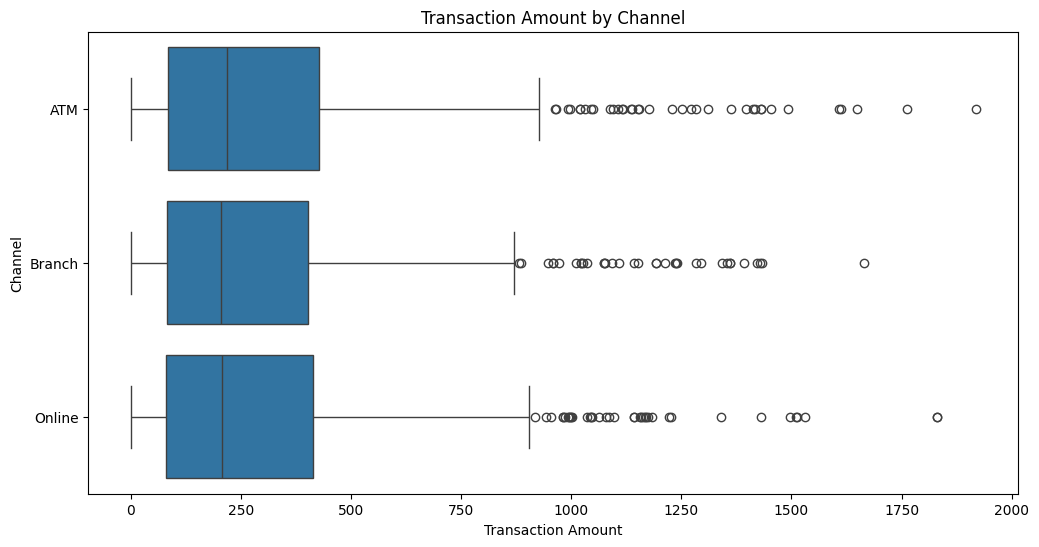

In [31]:
# average anount by channel
# box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TransactionAmount', y='Channel')
plt.title('Transaction Amount by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Channel')
plt.show()

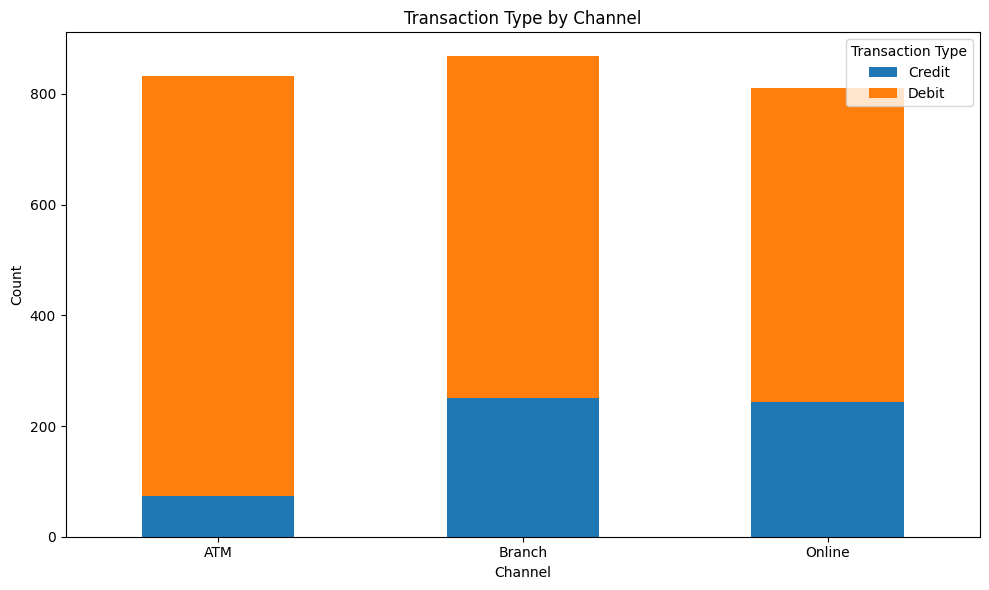

In [32]:
# stacked bar of transaction type by channel
# pivot table
pivot_table = df.pivot_table(index='Channel', columns='TransactionType', values='TransactionID', aggfunc='count', fill_value=0, observed=False)
# plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Transaction Type by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

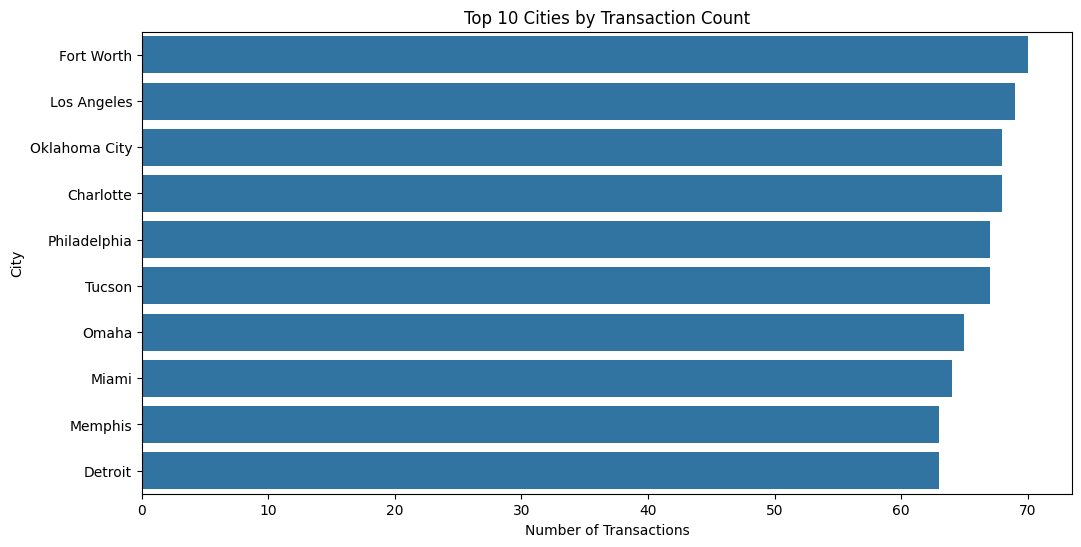

In [33]:
# top cities by transaction count
# horizontal bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Cities by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.show()

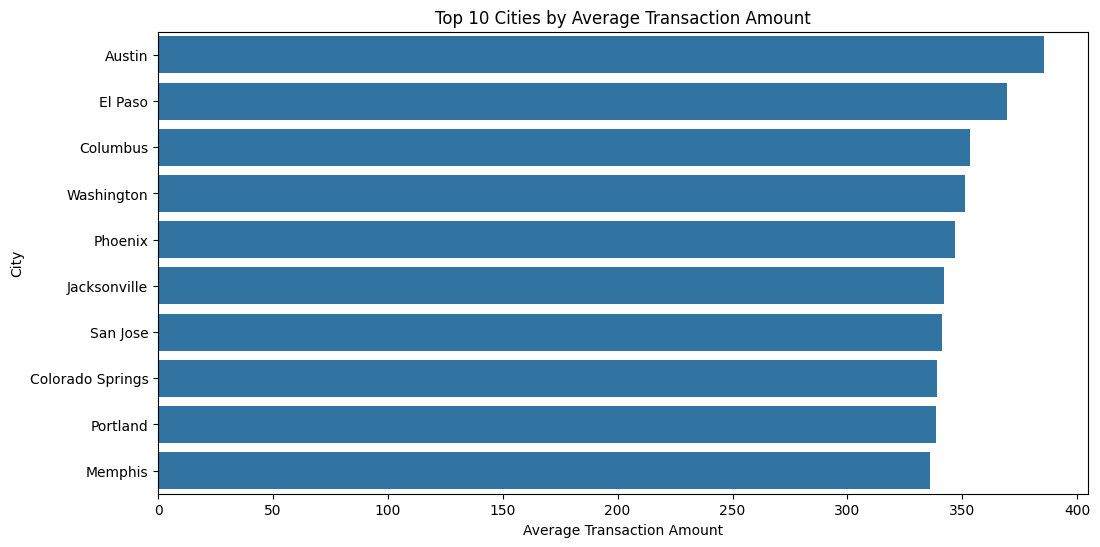

In [34]:
# top cities by average transaction amount
# horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Location', x='TransactionAmount', estimator=np.mean, errorbar=None, order=df.groupby('Location')['TransactionAmount'].mean().nlargest(10).index)
plt.title('Top 10 Cities by Average Transaction Amount')
plt.xlabel('Average Transaction Amount')
plt.ylabel('City')
plt.show()

#### Anomalies & Risk Indicators

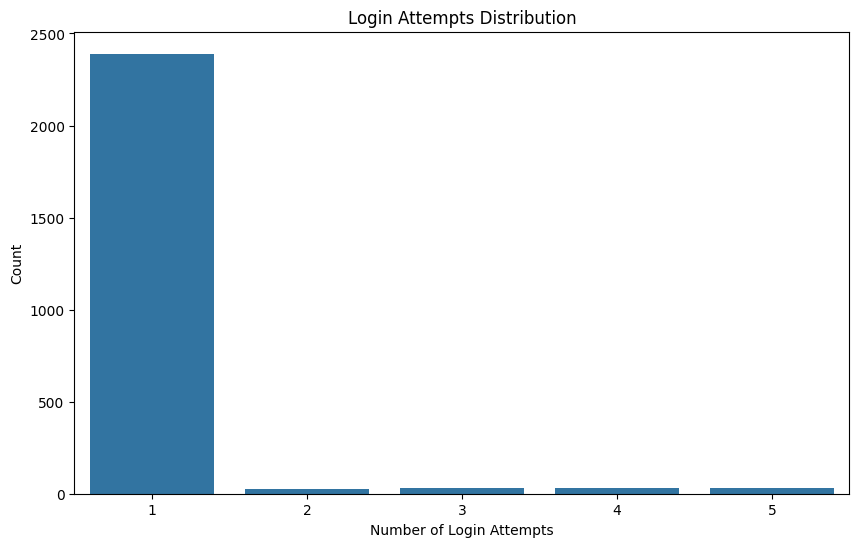

In [35]:
# login attempts distribution
# bar chart of login attempt
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LoginAttempts')
plt.title('Login Attempts Distribution')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.show()

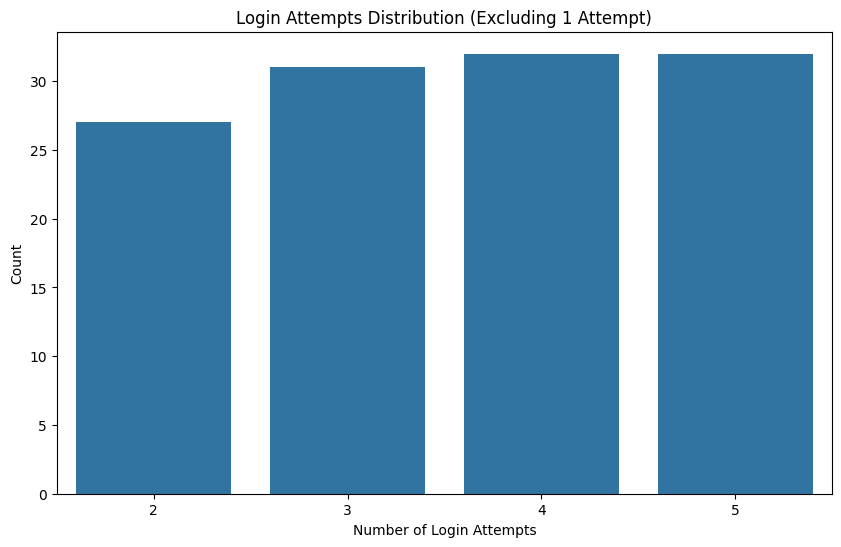

In [36]:
# login attempts distribution, excluding LoginAttempts = 1
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['LoginAttempts'] > 1], x='LoginAttempts')
plt.title('Login Attempts Distribution (Excluding 1 Attempt)')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.show()

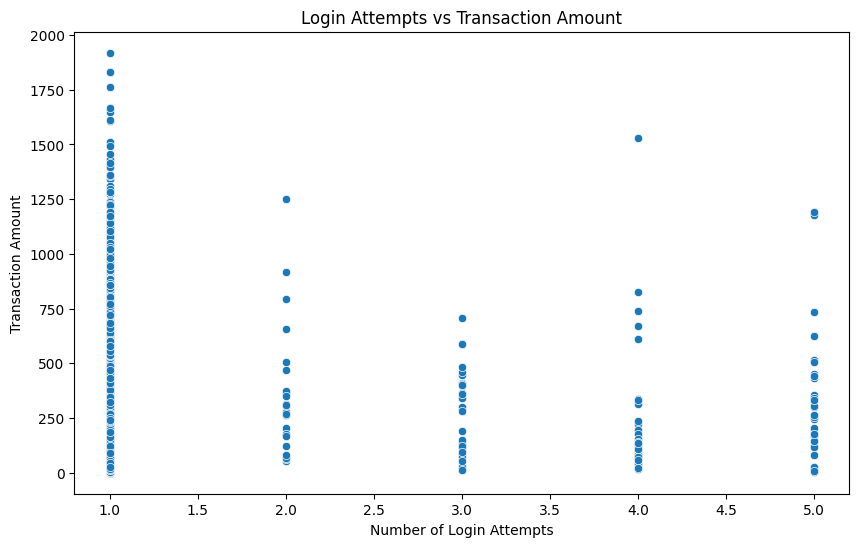

In [37]:
# login attempts vs transaction amount as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoginAttempts', y='TransactionAmount')
plt.title('Login Attempts vs Transaction Amount')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Transaction Amount')
plt.show()

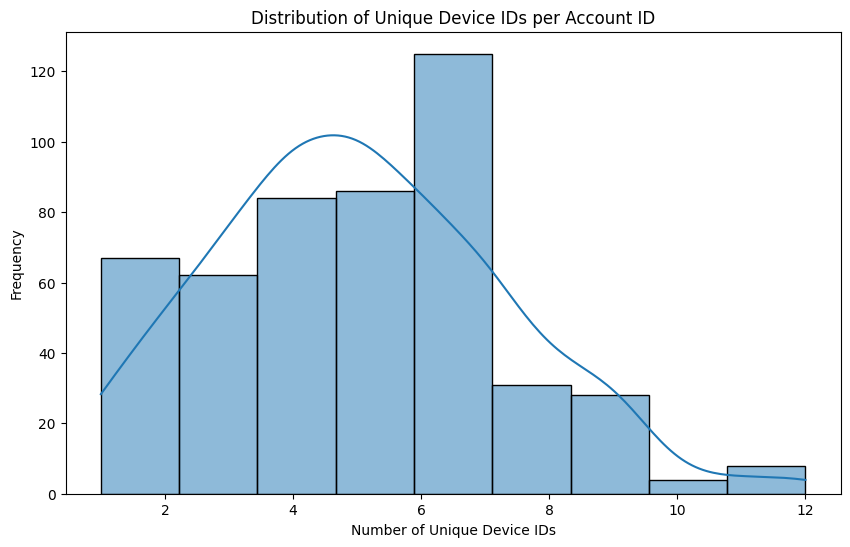

In [38]:
# deviceid usage per account
# histogram of unique DeviceIDs per AccountID
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('AccountID')['DeviceID'].nunique(), bins=df['DeviceID'].value_counts().max(), kde=True)
plt.title('Distribution of Unique Device IDs per Account ID')
plt.xlabel('Number of Unique Device IDs')
plt.ylabel('Frequency')
plt.show()

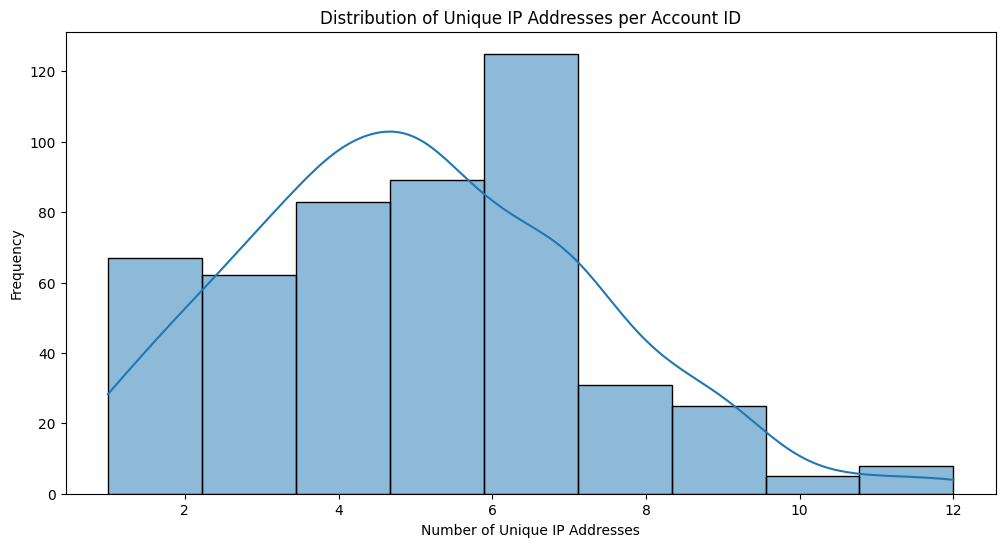

In [39]:
# ip address changes per account
# histogram of unique IP addresses per AccountID
plt.figure(figsize=(12, 6))
sns.histplot(df.groupby('AccountID')['IP Address'].nunique(), bins=df['DeviceID'].value_counts().max(), kde=True)
plt.title('Distribution of Unique IP Addresses per Account ID')
plt.xlabel('Number of Unique IP Addresses')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Step 1: Filter to top accounts
top_accounts = df['AccountID'].value_counts().head(10).index
sample_df = df[df['AccountID'].isin(top_accounts)]

# Step 2: Build the graph
G = nx.Graph()

# Add nodes
for account in sample_df['AccountID'].unique():
    G.add_node(account, type='account')

for device in sample_df['DeviceID'].unique():
    G.add_node(device, type='device')

for ip in sample_df['IP Address'].unique():
    G.add_node(ip, type='ip')

# Add edges
for _, row in sample_df.iterrows():
    G.add_edge(row['AccountID'], row['DeviceID'])
    G.add_edge(row['AccountID'], row['IP Address'])

# Step 3: Get layout positions
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)

# Prepare node scatter plots
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color=[],
        size=15,
        line_width=2
    ),
    textposition="top center"
)

# Assign colors based on type
color_dict = {'account': 'skyblue', 'device': 'green', 'ip': 'orange'}

for node, attributes in G.nodes(data=True):
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple([color_dict[attributes['type']]])
    node_trace['text'] += tuple([f"{attributes['type'].capitalize()}: {node}" if attributes['type'] == 'account' else ''])

# Prepare edge traces
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Plot layout
fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Interactive Network Graph of Device and IP Address Usage Across Top 10 Accounts',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        width=1200,
        height=1200
    )
)

fig.show()

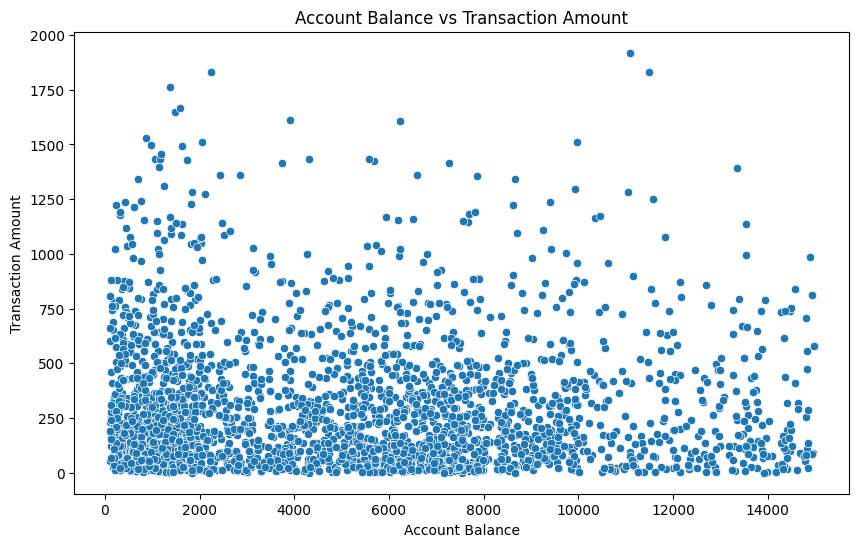

In [41]:
# scatter plot of balance vs transaction amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount')
plt.title('Account Balance vs Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

#### Summary & Insights

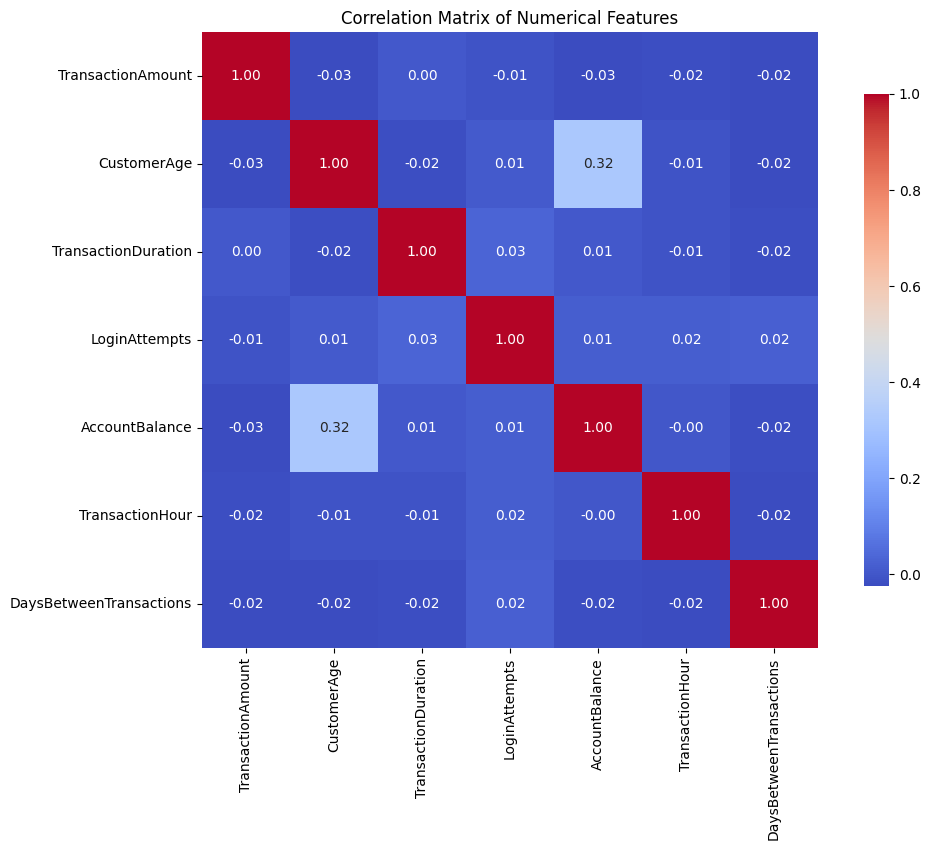

In [42]:
# calculate the correlation matrix for numerical features
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
# plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()